In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [142]:
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
from pathlib import Path

In [144]:
data_dir = Path('../data/chest_xray')
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'

In [145]:
print(os.listdir(train_dir))
print(os.listdir(test_dir))
print(os.listdir(val_dir))

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [146]:
categories = ['NORMAL', 'PNEUMONIA']

In [147]:
print(len(os.listdir(train_dir / 'PNEUMONIA')))
print(len(os.listdir(train_dir / 'NORMAL')))
print(len(os.listdir(test_dir / 'PNEUMONIA')))
print(len(os.listdir(test_dir / 'NORMAL')))
print(len(os.listdir(val_dir / 'PNEUMONIA')))
print(len(os.listdir(val_dir / 'NORMAL')))

3875
1341
390
234
8
8


In [148]:
normal_dir = train_dir / 'NORMAL'
pneumonia_dir = train_dir / 'PNEUMONIA'

In [149]:
import random

In [150]:
normal_images = os.listdir(normal_dir)
random_normal_image = random.choice(normal_images)
normal_image_path = normal_dir / random_normal_image

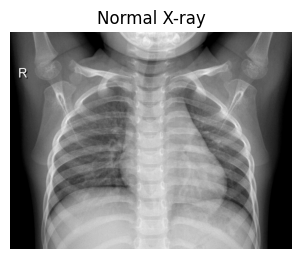

In [151]:
plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread(normal_image_path), cmap='gray')
plt.title('Normal X-ray')
plt.axis('off')
plt.show()

In [152]:
pneumonia_images = os.listdir(pneumonia_dir)
random_pneumonia_image = random.choice(pneumonia_images)
pneumonia_image_path = pneumonia_dir / random_pneumonia_image

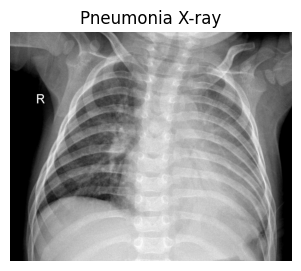

In [153]:
plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 2)
plt.imshow(plt.imread(pneumonia_image_path), cmap='gray')
plt.title('Pneumonia X-ray')
plt.axis('off')
plt.show()

In [154]:
train_gen = ImageDataGenerator(rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True)                                
test_gen = ImageDataGenerator(rescale=1./255)                                
val_gen = ImageDataGenerator(rescale=1./255)                                

In [155]:
batch_size = 32
target_size = (224, 224)

In [156]:
train_set = train_gen.flow_from_directory(train_dir,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            class_mode='binary')

test_set = test_gen.flow_from_directory(test_dir, shuffle=False,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='binary')

val_set = val_gen.flow_from_directory(val_dir, shuffle=False,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [157]:
import seaborn as sns

In [158]:
class_counts = np.bincount(train_set.classes)

C:\Users\Predator\AppData\Local\Temp\ipykernel_14836\4230027095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_generator.classes, palette='viridis')


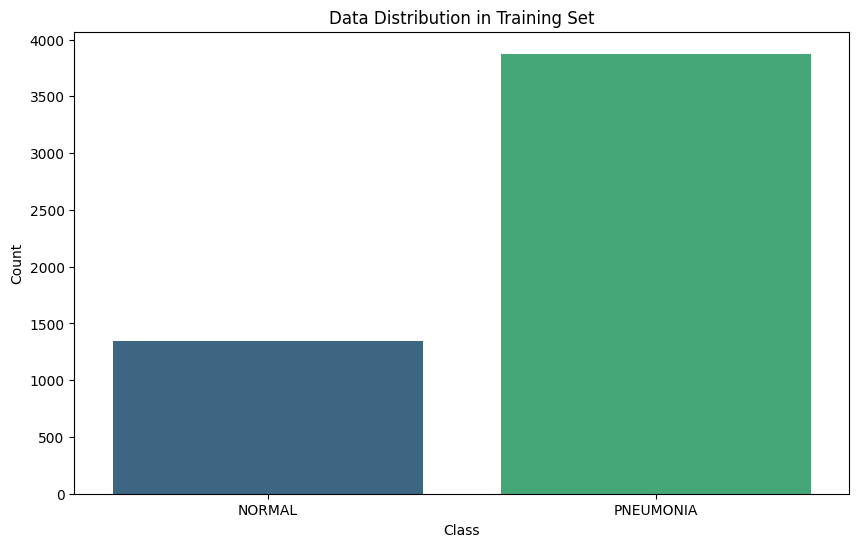

NORMAL: 1341
PNEUMONIA: 3875


In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_set.classes, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution in Training Set')
plt.xticks(range(2), categories)
plt.show()

for i, count in enumerate(class_counts):
    print(f"{categories[i]}: {count}")


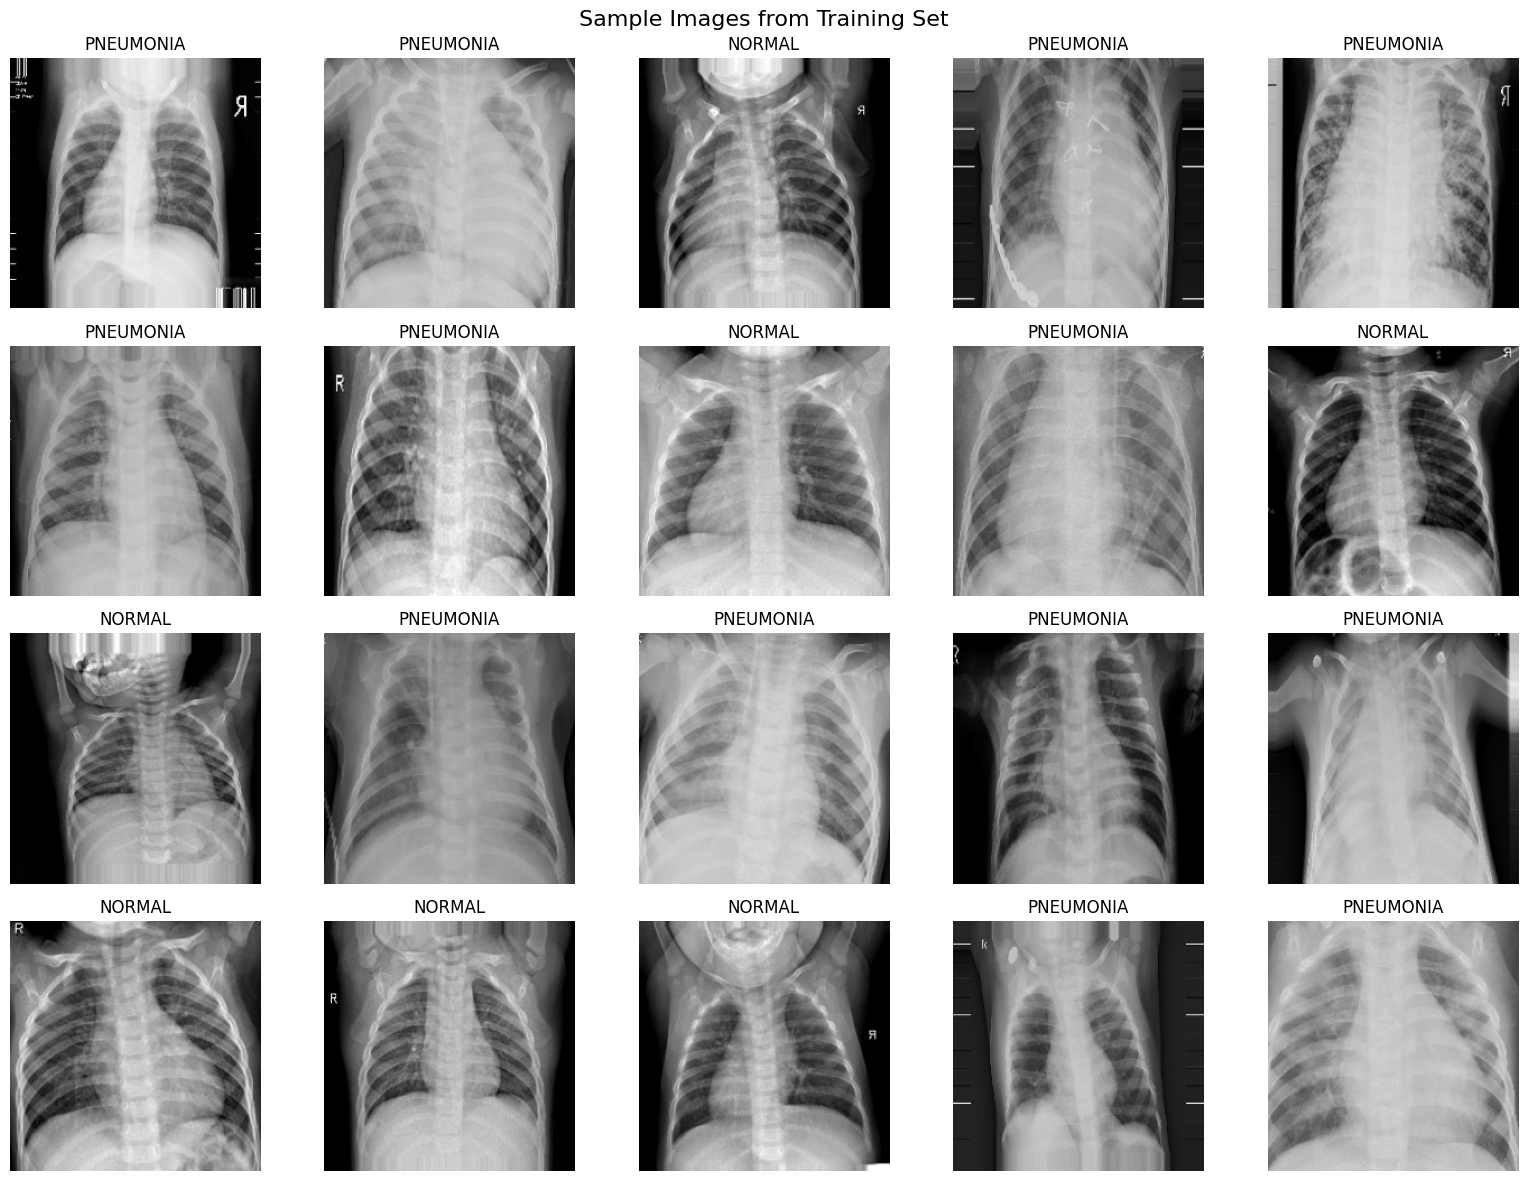

In [160]:
num_images = 20
num_rows = 4
num_cols = 5

plt.figure(figsize=(16, 12))
for i in range(num_images):
    image, label = train_set.next()
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image[0])
    plt.title(categories[int(label[0])])
    plt.axis('off')

plt.suptitle('Sample Images from Training Set', fontsize=16)
plt.tight_layout()
plt.show()


In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D, BatchNormalization

In [162]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 224, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))


In [163]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 128)      

In [165]:
history = model.fit(train_set,
                    epochs=50,
                    validation_data=test_set)

Epoch 1/50
163/163 [==============================] - 294s 2s/step - loss: 0.4163 - accuracy: 0.8190 - val_loss: 0.3376 - val_accuracy: 0.8558
Epoch 2/50
163/163 [==============================] - 290s 2s/step - loss: 0.2681 - accuracy: 0.8873 - val_loss: 0.3742 - val_accuracy: 0.8349
Epoch 3/50
163/163 [==============================] - 284s 2s/step - loss: 0.2429 - accuracy: 0.9007 - val_loss: 0.3253 - val_accuracy: 0.8494
Epoch 4/50
163/163 [==============================] - 282s 2s/step - loss: 0.2247 - accuracy: 0.9107 - val_loss: 0.4047 - val_accuracy: 0.8542
Epoch 5/50
163/163 [==============================] - 283s 2s/step - loss: 0.2081 - accuracy: 0.9202 - val_loss: 0.6105 - val_accuracy: 0.8013
Epoch 6/50
163/163 [==============================] - 286s 2s/step - loss: 0.1849 - accuracy: 0.9264 - val_loss: 0.4432 - val_accuracy: 0.8429
Epoch 7/50
163/163 [==============================] - 281s 2s/step - loss: 0.1836 - accuracy: 0.9302 - val_loss: 0.3462 - val_accuracy: 0.8846

In [183]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 163}

In [182]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [178]:
history.history['accuracy']

[0.8190184235572815,
 0.887269914150238,
 0.9006901979446411,
 0.9106594920158386,
 0.9202454090118408,
 0.9263803958892822,
 0.9302147030830383,
 0.9369248747825623,
 0.9396088719367981,
 0.9407591819763184,
 0.9424846768379211,
 0.9422929286956787,
 0.9467024803161621,
 0.9436349868774414,
 0.9526457190513611,
 0.9557132124900818,
 0.9534125924110413,
 0.9559049010276794,
 0.9511119723320007,
 0.9633818864822388,
 0.9562883377075195,
 0.9585889577865601,
 0.9524539709091187,
 0.9541794657707214,
 0.9570552110671997,
 0.9677914381027222,
 0.9624233245849609,
 0.964532196521759,
 0.9601227045059204,
 0.9622315764427185,
 0.9675996899604797,
 0.9647239446640015,
 0.9697085618972778,
 0.9658742547035217,
 0.9654908180236816,
 0.9675996899604797,
 0.9668328166007996,
 0.9693251252174377,
 0.9672162532806396,
 0.9693251252174377,
 0.9683665633201599,
 0.9693251252174377,
 0.9697085618972778,
 0.9691334366798401,
 0.9708588719367981,
 0.9689416885375977,
 0.9685583114624023,
 0.969516873359

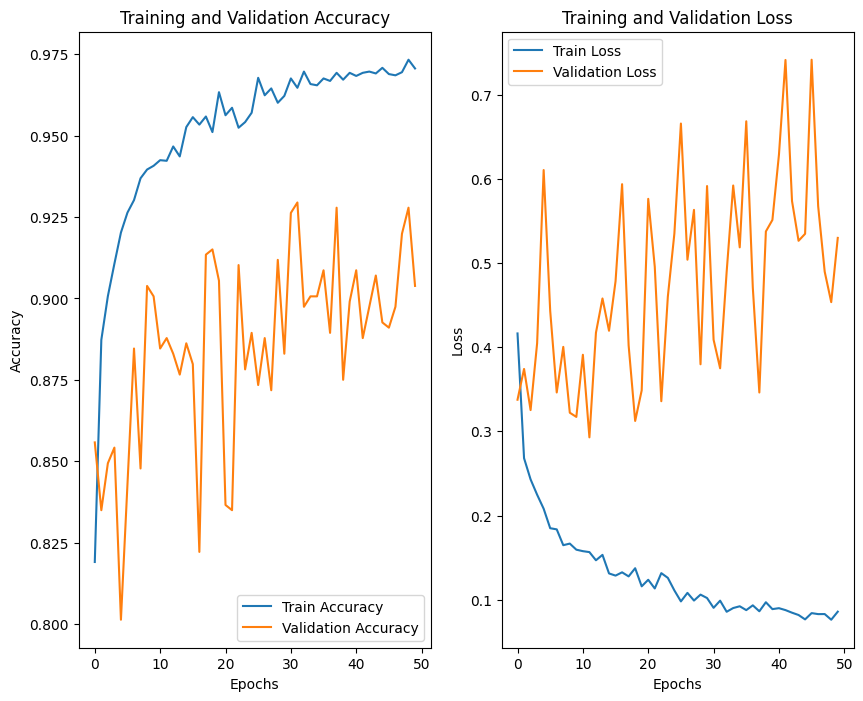

In [179]:
# Plot training history
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [180]:
test_loss, test_accuracy = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 [==============================] - 11s 500ms/step - loss: 0.5298 - accuracy: 0.9038
Test Loss: 0.5298336744308472
Test Accuracy: 0.9038461446762085


In [181]:
predictions = model.predict(test_set)
predicted_classes = (predictions > 0.5).astype("int32")

20/20 [==============================] - 10s 468ms/step


1/1 [==============================] - 0s 60ms/step


C:\Users\Predator\AppData\Local\Temp\ipykernel_14836\580870766.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction > 0.5)
C:\Users\Predator\AppData\Local\Temp\ipykernel_14836\580870766.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(confidence)


1/1 [==============================] - 0s 47ms/step


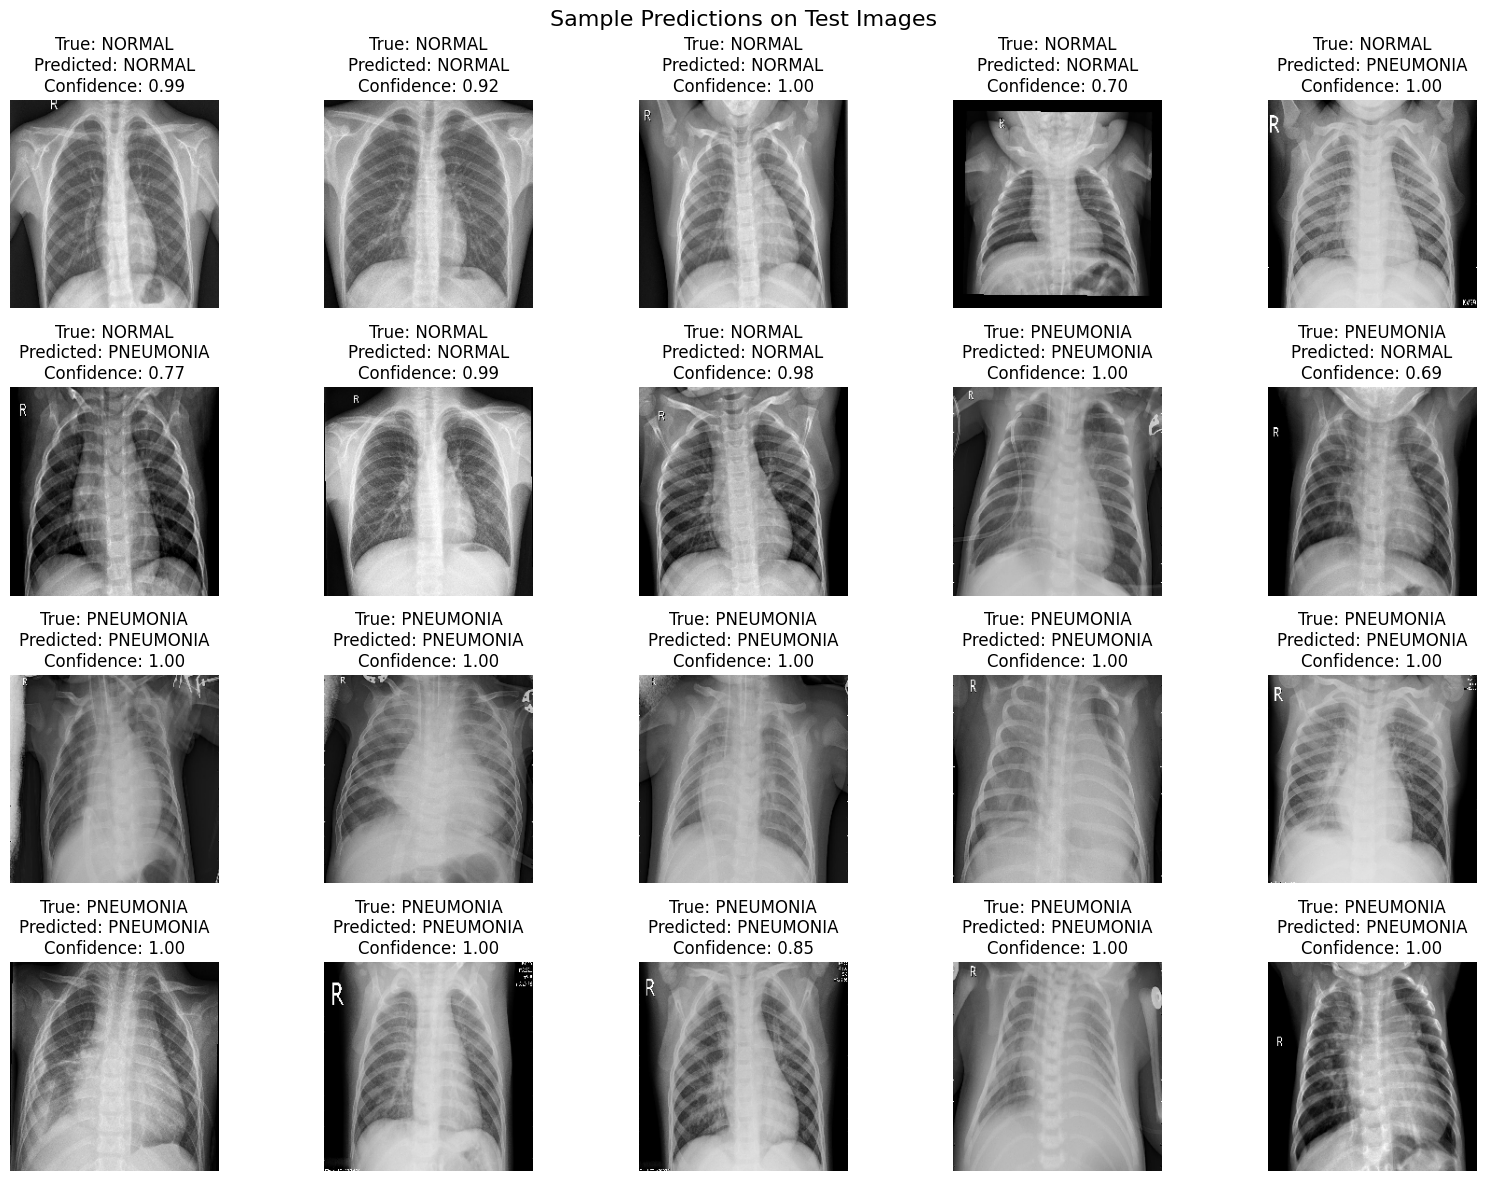

In [184]:
num_images = 20
num_rows = 4
num_cols = 5

plt.figure(figsize=(16, 12))
for i in range(num_images):
    image_batch, label_batch = next(test_set)
    image = image_batch[0]
    true_label = label_batch[0]
    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_class = int(prediction > 0.5)
    confidence = prediction if predicted_class == 1 else 1 - prediction

    true_label = int(true_label)
    confidence = float(confidence)

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image)
    plt.title(f"True: {categories[true_label]}\nPredicted: {categories[predicted_class]}\nConfidence: {confidence:.2f}")
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Images', fontsize=16)
plt.tight_layout()
plt.show()


In [193]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

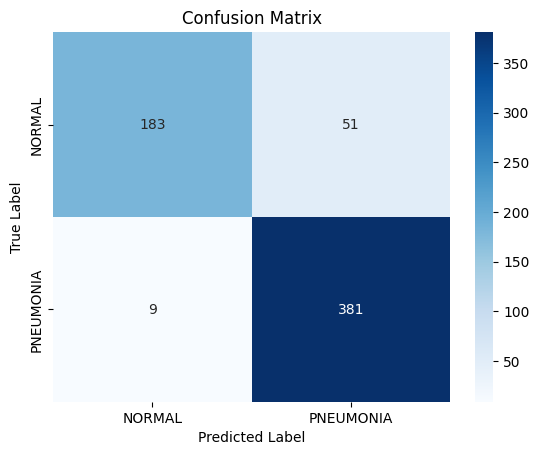

In [194]:
conf_matrix = tf.math.confusion_matrix(test_set.classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [190]:
print(classification_report(test_set.classes, predicted_classes, target_names=categories))

              precision    recall  f1-score   support

      NORMAL       0.95      0.78      0.86       234
   PNEUMONIA       0.88      0.98      0.93       390

    accuracy                           0.90       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.90      0.90       624



In [191]:
f1_score(test_set.classes, predicted_classes)

0.927007299270073

In [192]:
model.save('../models/model.h5')

c:\Users\Predator\Desktop\pneumonia\FinalYearProject\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
